In [1]:
import sys
sys.path.append('./../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [37]:
def ks_test( sample1, sample2, tag = '', bins=None ):
    from scipy import stats
    #bins = np.linspace(100, 110, 100)

    fig, (ax,ax2) = plt.subplots(2,1,figsize=(7,10))
    N1, _, _= ax.hist(sample1, bins = bins, normed=True  )
    N2, _, _= ax.hist(sample2, bins = bins,normed=True, histtype='step'  )
    ax.set_xlabel(tag)
    ax.set_ylabel('N')
    
    CN1 = np.array([ np.sum(N1[0:i]) for i in range(1, len(N1)+1) ])
    CN2 = np.array([ np.sum(N2[0:i]) for i in range(1, len(N2)+1) ])

    D, p_value = stats.ks_2samp(sample1, sample2)
    
    #fig, ax = plt.subplots()
    ax2.plot(bins[:-1], CN1*1./CN1[-1])
    ax2.plot(bins[:-1], CN2*1./CN2[-1])
    ax2.set_xlabel(tag)
    ax2.set_ylabel('Cumulative Probability')
    ax2.text(bins[0], 0.8, 'D = {:0.5e}\np_value = {:0.8f}\n'.format(D, p_value*100) )



In [2]:
from systematics_module.corr import *

In [9]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_sgc = esutil.io.read(path+'cmass-dr12v4-S-Reid-full.dat.fits')
cmass_ngc = esutil.io.read(path+'cmass-dr12v4-N-Reid-full.dat.fits')
#cmass_sgc = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.75)]

random_sgc = esutil.io.read(path+'random0_DR12v5_CMASS_South.fits.gz')
#random_sgc = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.75)]

### fiber collision objects vs others
KS test

In [10]:
fibcollmask = cmass_sgc['IMATCH'] == 3

In [11]:
closepair = cmass_sgc[fibcollmask]
others = cmass_sgc[~fibcollmask]

In [12]:
closepair.size, others.size

(11163, 247721)

In [13]:
np.sum(others['WEIGHT_CP'] == 2)

8811

In [14]:
closepair['Z']

array([0.5100666, 0.5043895, 0.6302815, ..., 0.5346962, 0.505915 ,
       0.5048302], dtype=float32)

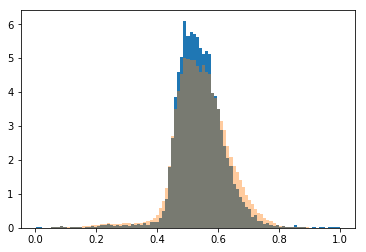

In [15]:
zbin = np.linspace(0.001, 1.0, 100)
fig, ax = plt.subplots()
_ = ax.hist(closepair['Z'], bins=zbin, normed = True  )
_ = ax.hist(others['Z'], bins=zbin, alpha=0.4, normed=True  )

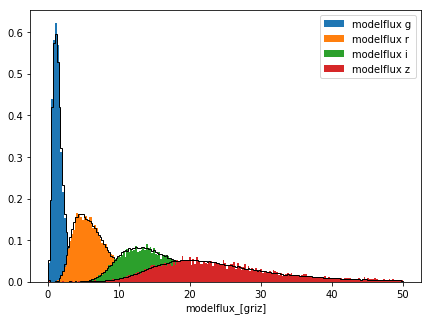

In [52]:
fluxbin = np.linspace(0, 50, 200)
fig, ax = plt.subplots( figsize = (7,5))
_ = ax.hist( closepair['MODELFLUX'][:,1], bins = fluxbin, normed=True, label='modelflux g')
_ = ax.hist( others['MODELFLUX'][:,1], bins = fluxbin, normed=True, histtype='step', color='k')

_ = ax.hist( closepair['MODELFLUX'][:,2], bins = fluxbin, normed=True, label='modelflux r')
_ = ax.hist( others['MODELFLUX'][:,2], bins = fluxbin, normed=True, histtype='step', color='k')

_ = ax.hist( closepair['MODELFLUX'][:,3], bins = fluxbin, normed=True, label='modelflux i')
_ = ax.hist( others['MODELFLUX'][:,3], bins = fluxbin, normed=True, histtype='step', color='k')

_ = ax.hist( closepair['MODELFLUX'][:,4], bins = fluxbin, normed=True, label='modelflux z')
_ = ax.hist( others['MODELFLUX'][:,4], bins = fluxbin, normed=True, histtype='step', color='k')

ax.legend()
ax.set_xlabel('modelflux_[griz]')

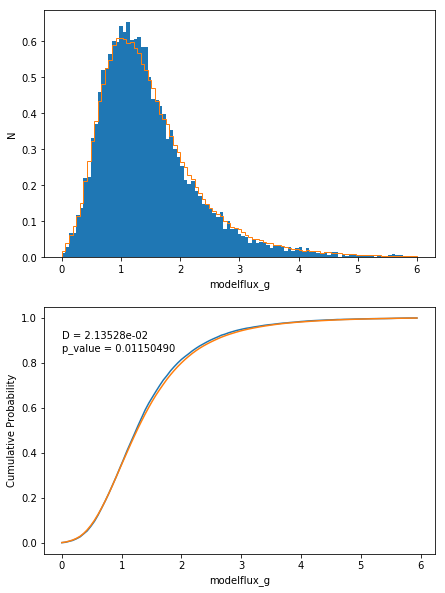

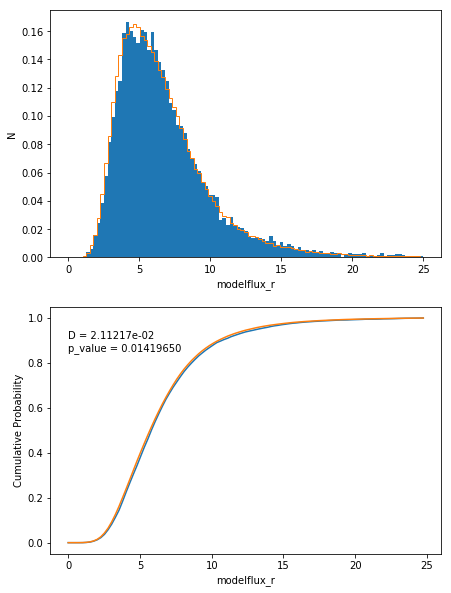

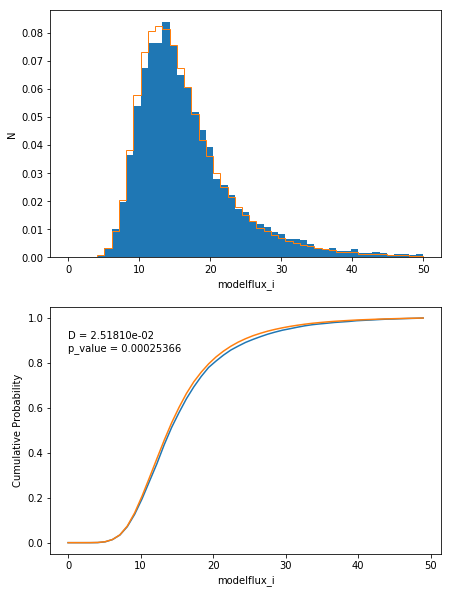

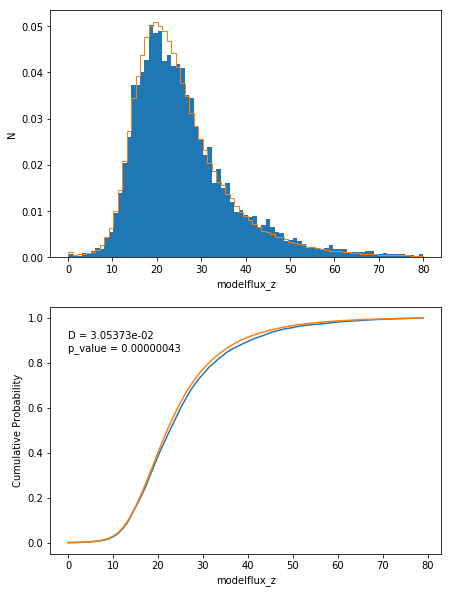

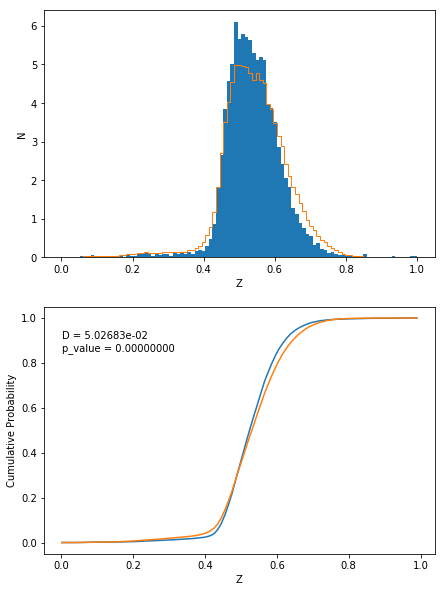

In [50]:
fluxbin_g = np.linspace(0, 6, 100)
fluxbin_r = np.linspace(0, 25, 100)
fluxbin_i = np.linspace(0, 50, 50)
fluxbin_z = np.linspace(0, 80, 80)

ks_test( closepair['MODELFLUX'][:,1], others['MODELFLUX'][:,1], tag = 'modelflux_g', bins=fluxbin_g)
ks_test( closepair['MODELFLUX'][:,2], others['MODELFLUX'][:,2], tag = 'modelflux_r', bins=fluxbin_r)
ks_test( closepair['MODELFLUX'][:,3], others['MODELFLUX'][:,3], tag = 'modelflux_i', bins=fluxbin_i)
ks_test( closepair['MODELFLUX'][:,4], others['MODELFLUX'][:,4], tag = 'modelflux_z', bins=fluxbin_z)

zbin = np.linspace(0.001, 1.0, 100)
ks_test( closepair['Z'], others['Z'], tag = 'Z', bins=zbin)

In [5]:
# dmass spt
#dmass_spt = fitsio.read('result_cat/dmass_spt.fits')
dmass_spt = esutil.io.read('../output/n2_2/dmass_spt.fits')

In [6]:
random_spt = uniform_random_on_sphere(dmass_spt, size = 10 * dmass_spt.size)
random_spt = Cuts.keepGoodRegion(random_spt)

In [28]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = '../data_txt/'
#angular_correlation(data = dmass_spt, rand = GoldMask_spt, weight = None, njack = 50, 
#                    suffix = '_dmass_spt_no2', dir=basedir)
angular_correlation(data = dmass_spt, rand = random_spt, weight = None, njack = 50, 
                    suffix = '_dmass_spt_rand', dir = basedir)


calculate angular correlation function
X (670, 2)  centers (50, 2)  tol=1e-05  maxiter=200
12 iterations  cluster sizes: [ 9 25  9 14 14  7 11 30 22 19  5  6  4  9 11 11 26 13 12  6 13 16  6  8
 11  8 18  7 13 17 32 18  8 10 24 23  9 26 11 12  9 12 15 19 13 11 11  5
 16  6]
X (112398, 2)  centers (50, 2)  tol=1e-05  maxiter=200
78 iterations  cluster sizes: [2380 2588 2505 1528 2145 2320 1788 1010 3022 2723 1819 1501 1285 1819
 2237 3131 2373 1918 2378 2136 2378 2751 1512 2111 1901 2108 2979 2531
 2463 2467 3790 1640 2142 2269 2051 2680 2143 1804 2759 2403 2418 2490
 1543 2630 1687 2728 1858 2701 2410 2445]
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . saving data file to :  ../data_txt//acf_auto_dmass_spt_rand.txt


In [ ]:
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, njack = 50, 
#                    suffix = '_dmass_spt_rand', dir = basedir)

w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = random_sgc['WEIGHT_FKP']

#cmass_sgc = appendColumn(cmass_sgc, name = 'WEIGHT', value = w_sgc)
#random_sgc = appendColumn(random_sgc, name = 'WEIGHT_RAND', value = w_rand)
random_ind = np.random.choice( random_sgc.size, size = random_sgc.size/10)
angular_correlation(data = cmass_sgc, rand = random_sgc[random_ind], njack = 100, weight = [True, True], 
                    suffix = '_cmass_sgc_weight', dir = '../data_txt/' )


calculate angular correlation function
X (1000, 2)  centers (100, 2)  tol=1e-05  maxiter=200
17 iterations  cluster sizes: [18 10  7 14  9  8  8 18 11 11 15 18  7 18 13 11  9 10 17 14 17 20 11 12
  6 14 15 16 13  9  5  9 12  7  3  6  8  2  6 13  5  8 10  9  4  7  4  7
 18  9 12  6  7  8  1  5 25 18  6  5  7  9  4 12  8 11 10  6 10 12 18  4
  9 15  9  7 12 11  5 10  7 19  9  6  7 11  5 14  6  9 11 11 14  7  8 11
 10  8  8  6]
X (230831, 2)  centers (100, 2)  tol=1e-05  maxiter=200


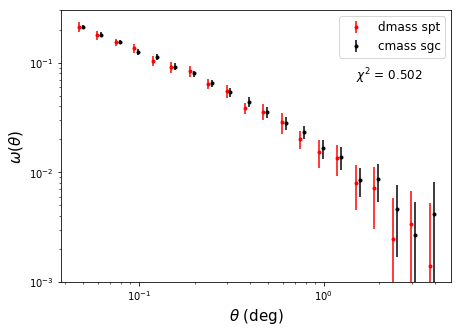

In [9]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_rand.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
#DAT2 = np.loadtxt('../data_txt/acf_comparison_cmass_sgc_nbin20.txt')
DAT2 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no3.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
#DAT3 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
#meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]
fig, ax = plt.subplots(figsize = (7, 5))

ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')

cov = np.genfromtxt('../data_txt/acf_auto_dmass_spt_no2.cov')
cov_cmass = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_no3.cov')
vdiff = xi - xi2
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov)), vdiff)/vdiff.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')

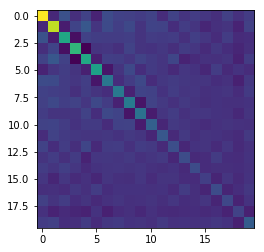

In [10]:
fig, ax = plt.subplots()
ax.imshow(cov_cmass)